In [1]:
import argparse
import h5py
from os import walk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from scipy.spatial.distance import directed_hausdorff

In [2]:
def plot_ecg(ecg_record, label='ECG', fig_len=80):
    '''
    Makes plots sized appropriately for ecg files containing 8000
    samples. This method can will plot any number of leads.

    Parameters:
        ecg_record (ndarray): Numpy array containing the ecg data. This may
                                  be a 1D array representing a single lead
                                  or a 2D array with each column representing a 
                                  lead
        output_file (string): The path (including file name) for the graph output png
        label (string): A unique label for the ecg. This will be used to label the plots
    Returns:
        None
    '''
    plt.clf()
    x_axis = np.arange(len(ecg_record))
    if ecg_record.ndim == 2:
        fig, axs = plt.subplots(ecg_record.shape[1], figsize=(100, 100))
        for i in range(len(axs)):
            axs[i].plot(x_axis, ecg_record[:, i])
            axs[i].set_title('Lead {0}'.format(i))
        fig.suptitle(label, fontsize=16)
   
    else:
        figure(figsize=(fig_len, 5))
        plt.plot(x_axis, ecg_record)
        plt.title(label)

In [3]:
f = h5py.File("/data/mcw_ecg/ecg-traces/preprocessed/traces.hdf5", 'r')
first_20 = f['signal'][0:20, :, :]
i = 0
for ecg in first_20:
    #plot_ecg(np.array(ecg), './ecg_' + str(i) + '.png')
    i+=1
f.close()

<Figure size 432x288 with 0 Axes>

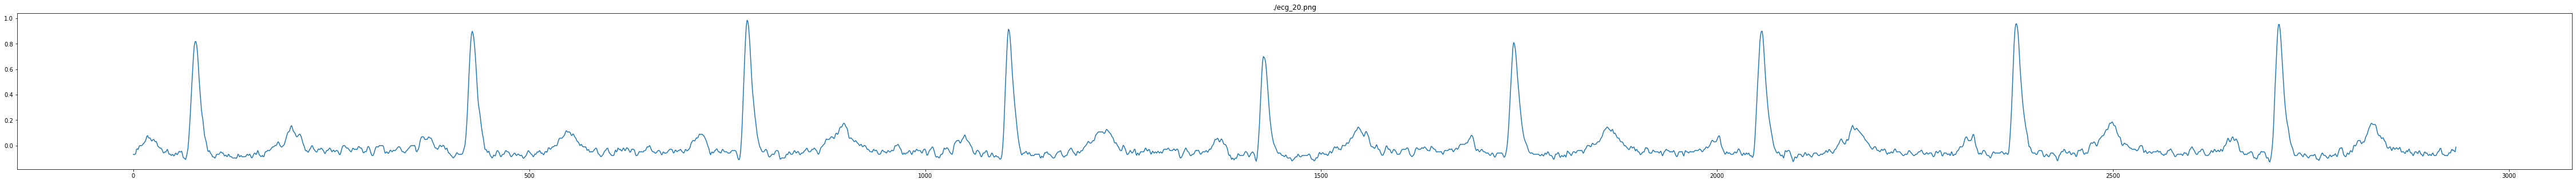

In [4]:
plot_ecg(np.trim_zeros(first_20[0].T[0]), './ecg_' + str(i) + '.png')

<Figure size 432x288 with 0 Axes>

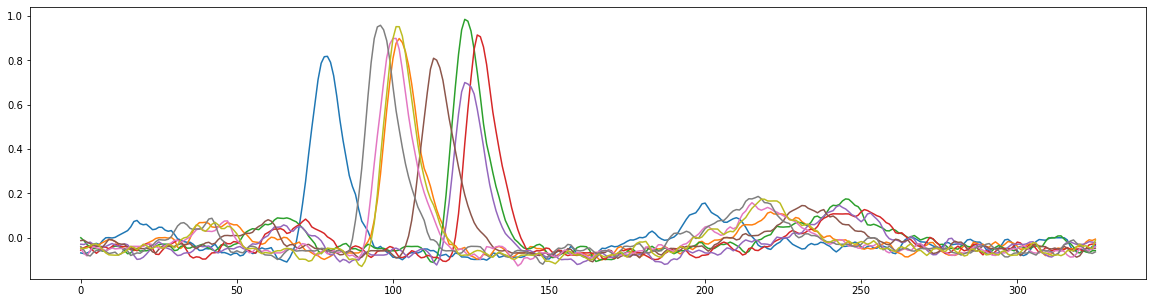

In [5]:
beats = []
j = 0
k = 326
for i in range(9):
    beats.append(np.trim_zeros(first_20[0].T[0])[j:k])
    j += 326
    k += 326

    
plt.clf()
x_axis = np.arange(326)
figure(figsize=(20, 5))

for i in range(len(beats)):
    plt.plot(x_axis, beats[i])

plt.show()

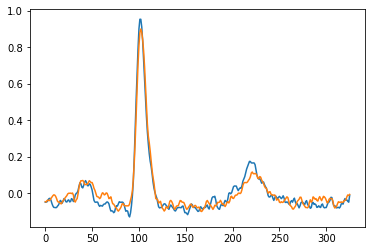

In [6]:
plt.plot(x_axis, beats[8])
plt.plot(x_axis, beats[1])
beats[7] = np.roll(beats[7], 5)

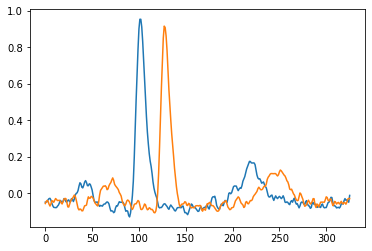

In [14]:
plt.plot(x_axis, beats[8])
plt.plot(x_axis, beats[3])

In [8]:
arr7 = np.amax(beats[7])
result7 = np.where(beats[7] == np.amax(beats[7]))
arr8 = np.amax(beats[8])
result8 = np.where(beats[8] == np.amax(beats[8]))
print(result7)
print(result8)

(array([101]),)
(array([101]),)


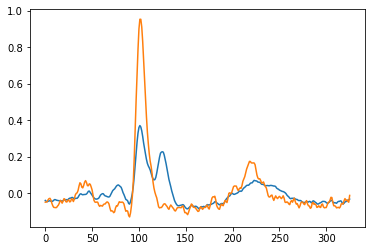

In [9]:
avg = np.mean(beats, axis=0)
plt.plot(x_axis, avg)
plt.plot(x_axis, beats[8])

In [10]:
def similarity_score_sum_of_7th(avg, graph):
    diff = np.absolute(avg-graph)
    diff*=10
    diff = diff*diff*diff*diff*diff*diff*diff
    return np.sum(diff) / len(diff) / 10

In [11]:
print(similarity_score_sum_of_7th(beats[3], beats[8]))
print(similarity_score_sum_of_7th(beats[7], beats[8]))
print(similarity_score_sum_of_7th(beats[1], beats[8]))
print(similarity_score_sum_of_7th(avg, beats[8]))

27226.714110429446
0.008401460003999113
0.0015273967403575685
312.8671012269939


In [12]:
print(np.array(beats[8].shape))

[326]


In [13]:
print(directed_hausdorff(np.array(beats[8]), np.array(beats[3])))

IndexError: tuple index out of range